<a href="https://colab.research.google.com/github/Justabhi96/TF2.0/blob/master/6_ANN_Non_linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [0]:
def generate_points_in_circle(r, label, is_hollow = True):
    t = 2*math.pi*np.random.uniform()
    if is_hollow:
      R = (np.random.uniform(2,4) ** 0.5) * r
    else:
      R = (np.random.uniform(0,1) ** 0.5) * r
    return[R*math.cos(t), R*math.sin(t), label]

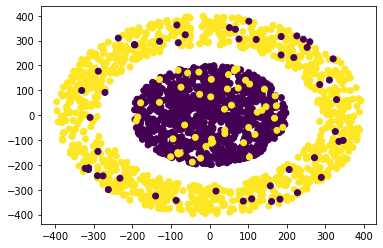

In [0]:
R = 200 # Radius
N = 1000 # Samples

points_0 = [generate_points_in_circle(R, 0, False) for i in range(N)]
df_0 = pd.DataFrame(points_0, columns = ["x_coords", "y_coords", "label"])
points_1 = [generate_points_in_circle(R, 1) for i in range(N)]
df_1 = pd.DataFrame(points_1, columns = ["x_coords", "y_coords", "label"])
df = df_0.append(df_1)

# to add impurity
N = 50
points_0 = np.array([generate_points_in_circle(R, 1, False) for i in range(N)])
df_0 = pd.DataFrame(points_0, columns = ["x_coords", "y_coords", "label"])
points_1 = np.array([generate_points_in_circle(R, 0) for i in range(N)])
df_1 = pd.DataFrame(points_1, columns = ["x_coords", "y_coords", "label"])
df = df.append(df_0)
df = df.append(df_1)

plt.scatter(df["x_coords"], df["y_coords"], c = df["label"])

In [0]:
X = df[["x_coords", "y_coords"]]
y = df["label"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape

((1680, 2), (420, 2))

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [0]:
scaled_X_test.shape

(420, 2)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape = (2, ), activation = "tanh"))
# model.add(tf.keras.layers.Dense(4, activation = "tanh"))
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])

r = model.fit(scaled_X_train, y_train, validation_data= (scaled_X_test, y_test), epochs = 40)

Train on 1680 samples, validate on 420 samples
Epoch 1/40
1680/1680 [==============================] - 0s 171us/sample - loss: 0.7969 - accuracy: 0.5054 - val_loss: 0.7856 - val_accuracy: 0.5095
Epoch 2/40
1680/1680 [==============================] - 0s 49us/sample - loss: 0.7591 - accuracy: 0.5292 - val_loss: 0.7524 - val_accuracy: 0.5286
Epoch 3/40
1680/1680 [==============================] - 0s 51us/sample - loss: 0.7306 - accuracy: 0.5560 - val_loss: 0.7275 - val_accuracy: 0.5452
Epoch 4/40
1680/1680 [==============================] - 0s 47us/sample - loss: 0.7100 - accuracy: 0.5780 - val_loss: 0.7087 - val_accuracy: 0.5667
Epoch 5/40
1680/1680 [==============================] - 0s 57us/sample - loss: 0.6945 - accuracy: 0.6125 - val_loss: 0.6951 - val_accuracy: 0.6190
Epoch 6/40
1680/1680 [==============================] - 0s 50us/sample - loss: 0.6832 - accuracy: 0.6595 - val_loss: 0.6856 - val_accuracy: 0.6500
Epoch 7/40
1680/1680 [==============================] - 0s 53us/sample

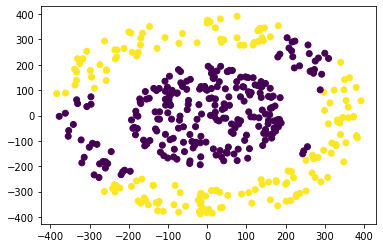

In [0]:
pred = model.predict_classes(scaled_X_test).reshape(-1)
plt.scatter(X_test["x_coords"], X_test["y_coords"], c = pred)